In [1]:
import torch

In [2]:
x_train = torch.FloatTensor([[1, 2], [2, 3], [3, 4], [4, 4], [5, 3], [6, 2]]) # [n시간 공부, n년치 족보 가짐]
y_train = torch.FloatTensor([[0], [0], [0], [1], [1], [1]]) # 점수 (0은 F, 1은 A+)

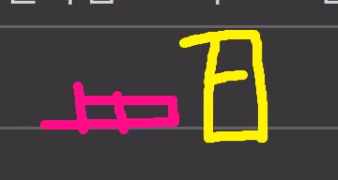

x: 빨간색, w: 노란색

In [3]:
x_train

tensor([[1., 2.],
        [2., 3.],
        [3., 4.],
        [4., 4.],
        [5., 3.],
        [6., 2.]])

In [4]:
y_train

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])

In [5]:
W = torch.randn([2, 1], requires_grad=True) # 생성되는 텐서의 기울기를 계산
b = torch.randn([1], requires_grad=True)

In [6]:
W

tensor([[0.9236],
        [0.2328]], requires_grad=True)

In [7]:
b

tensor([0.1525], requires_grad=True)

In [8]:
optimizer = torch.optim.SGD([W, b], lr=0.01) # 확률적 경사 하강법 이용해 W와 b 학습하겠다고 명시

In [9]:
# 딥러닝 1단계: 모델 만들기
def H(x):
    return torch.sigmoid(torch.matmul(x, W) + b) # H(x) = sigmoid(Wx+b)
    # 왜 sigmoid를 쓰나? -∞ ~ +∞의 입력을 받아 0~1의 값으로 출력하므로, 0.5를 기준으로 나눠주는 이진분류기를 만들 수 있음

In [ ]:
# 딥러닝 2단계: 학습 (W와 b값 구하는 과정)
for step in range(2000):
    cost = -torch.mean(y_train*torch.log(H(x_train)) + (1-y_train)*torch.log(1-H(x_train)))
    optimizer.zero_grad() # 이전 단계에서 계산된 기울기 초기화
    cost.backward() # 오차(cost)를 이용해 역전파 수행
    optimizer.step() # optimizer 이용해 W와 b 업데이트

In [ ]:
# 딥러닝 3단계: 추론/테스트
x_test = torch.FloatTensor([[6, 4]])
print(H(x_test).detach().item()) # .detach(): grad_fn 제거하고 출력하기 위함, item(): 리스트의 값만 출력하기 위함

0.9973817467689514
